In [1]:
import numpy as np
import pandas as pd

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import log_loss, roc_curve, roc_auc_score, zero_one_loss, classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from matplotlib import pyplot
from imblearn.under_sampling import NearMiss

In [2]:
#Reading the file and splitting our target column
df = pd.read_csv (r'bank-additional\bank-additional-clusters.csv')   

#categories_filter = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

#for x in categories_filter:
#    df.drop(df.index[df[x] == 'unknown'], inplace=True)

features = df.iloc[:, 0:29]
tussen = df.iloc[:, 29]
target = tussen.copy()
y = pd.get_dummies(target, drop_first=True)
df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True)

print(features)
#print(y)
#print(df)

           0    1         2         3         4         5         6         7  \
0   -0.29006  0.0 -0.443042 -0.566255 -0.116117  2.067572 -0.316228 -0.178988   
1   -0.29006  0.0 -0.443042 -0.566255 -0.116117  2.067572 -0.316228 -0.178988   
2   -0.29006  0.0 -0.443042 -0.566255 -0.116117  2.067572 -0.316228 -0.178988   
3   -0.29006  0.0 -0.443042 -0.566255 -0.116117  2.067572 -0.316228 -0.178988   
4   -0.29006  0.0 -0.443042 -0.566255 -0.116117  2.067572 -0.316228 -0.178988   
..       ...  ...       ...       ...       ...       ...       ...       ...   
897 -0.29006  0.0 -0.443042  1.765990 -0.116117 -0.483659 -0.316228 -0.178988   
898 -0.29006  0.0 -0.443042 -0.566255 -0.116117 -0.483659 -0.316228 -0.178988   
899 -0.29006  0.0 -0.443042 -0.566255 -0.116117 -0.483659 -0.316228 -0.178988   
900 -0.29006  0.0 -0.443042 -0.566255 -0.116117 -0.483659 -0.316228 -0.178988   
901 -0.29006  0.0 -0.443042 -0.566255 -0.116117 -0.483659 -0.316228 -0.178988   

            8         9  ..

In [3]:
# define lists to collect scores
train_scores, test_scores = list(), list()
def range_with_floats(start, stop, step):
    while stop > start:
        yield start
        start += step

In [4]:
train_features, test_features, train_targets, test_targets = train_test_split(features, y.values.ravel(), test_size=0.2,
                                                                                  random_state=23)
ensemble = GradientBoostingClassifier(max_depth=1, n_estimators=1 ,random_state=23).fit(
        train_features, train_targets)

#After the first run we make jumps of 10 and lastly 1 for n_estimator

param_grid = {'learning_rate': [0.1, 0.01, pow(10,-3), pow(10,-4), pow(10,-5), pow(10,-6)]
              , 'n_estimators': range(1,6000,1000)}
grid = GridSearchCV(ensemble,param_grid,refit=True, verbose =2)
grid.fit(train_features,train_targets)
print(grid.best_estimator_)

grid_predictions = grid.predict(test_features)
print(confusion_matrix(test_targets,grid_predictions))
print(classification_report(test_targets,grid_predictions))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ..................learning_rate=0.1, n_estimators=1; total time=   0.0s
[CV] END ..................learning_rate=0.1, n_estimators=1; total time=   0.0s
[CV] END ..................learning_rate=0.1, n_estimators=1; total time=   0.0s
[CV] END ..................learning_rate=0.1, n_estimators=1; total time=   0.0s
[CV] END ..................learning_rate=0.1, n_estimators=1; total time=   0.0s
[CV] END ...............learning_rate=0.1, n_estimators=1001; total time=   0.4s
[CV] END ...............learning_rate=0.1, n_estimators=1001; total time=   0.3s
[CV] END ...............learning_rate=0.1, n_estimators=1001; total time=   0.3s
[CV] END ...............learning_rate=0.1, n_estimators=1001; total time=   0.4s
[CV] END ...............learning_rate=0.1, n_estimators=1001; total time=   0.3s
[CV] END ...............learning_rate=0.1, n_estimators=2001; total time=   0.8s
[CV] END ...............learning_rate=0.1, n_es

[CV] END ............learning_rate=0.0001, n_estimators=2001; total time=   0.8s
[CV] END ............learning_rate=0.0001, n_estimators=2001; total time=   0.8s
[CV] END ............learning_rate=0.0001, n_estimators=2001; total time=   0.8s
[CV] END ............learning_rate=0.0001, n_estimators=2001; total time=   0.8s
[CV] END ............learning_rate=0.0001, n_estimators=3001; total time=   1.2s
[CV] END ............learning_rate=0.0001, n_estimators=3001; total time=   1.2s
[CV] END ............learning_rate=0.0001, n_estimators=3001; total time=   1.2s
[CV] END ............learning_rate=0.0001, n_estimators=3001; total time=   1.1s
[CV] END ............learning_rate=0.0001, n_estimators=3001; total time=   1.2s
[CV] END ............learning_rate=0.0001, n_estimators=4001; total time=   1.6s
[CV] END ............learning_rate=0.0001, n_estimators=4001; total time=   1.7s
[CV] END ............learning_rate=0.0001, n_estimators=4001; total time=   2.0s
[CV] END ............learnin

In [5]:
print("Best: %f using %s" % (grid.best_score_, grid.best_params_))

Best: 0.850172 using {'learning_rate': 0.1, 'n_estimators': 1001}


1.0000000, train: 0.735, test: 0.790
101.0000000, train: 0.867, test: 0.867
201.0000000, train: 0.863, test: 0.873
301.0000000, train: 0.877, test: 0.890
401.0000000, train: 0.879, test: 0.890
501.0000000, train: 0.882, test: 0.890
601.0000000, train: 0.885, test: 0.895
701.0000000, train: 0.883, test: 0.895
801.0000000, train: 0.883, test: 0.895
901.0000000, train: 0.885, test: 0.901


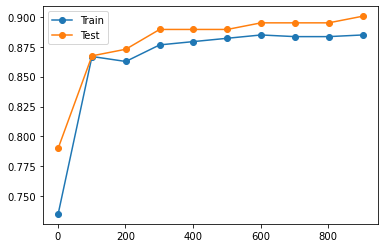

In [6]:
train_features, test_features, train_targets, test_targets = train_test_split(features, y.values.ravel(), test_size=0.2,
                                                                                  random_state=23)

#Now we set our n_estimator and learning_rate to the optimal value found in the last grid search
learningRate = 0.1
nEstimator = 1001

#Check for overfitting

# define the tree depths to evaluate
values = [i for i in range_with_floats(1, 1000, 100)]
# evaluate a decision tree for each depth
for i in values:
    # configure the model
    model = GradientBoostingClassifier(max_depth=1, learning_rate = 0.23, n_estimators=i, random_state=23).fit(
        train_features, train_targets)
    # evaluate on the train dataset
    schatting = model.predict(train_features)
    train_acc = accuracy_score(train_targets, schatting)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_schatting = model.predict(test_features)
    test_acc = accuracy_score(test_targets, test_schatting)
    test_scores.append(test_acc)
    # summarize progress
    print('%.7f, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [7]:
#Boosting the tree and predicting with ROC curve and classification reports
def gradient_boosted_tree(features, targets, learningRate, nEstimator):
    train_features, test_features, train_targets, test_targets = train_test_split(features, y.values.ravel(), test_size=0.2,
                                                                                  random_state=23)
    ensemble = GradientBoostingClassifier(max_depth=1, learning_rate = learningRate, n_estimators= nEstimator ,random_state=23)
    
    k = 10
    kf = KFold(n_splits=k, shuffle = True)

    
    dt_scores = cross_val_score(ensemble, train_features, train_targets, scoring ='roc_auc' ,cv = kf)
    print("mean cross validation score: {}".format(np.round(np.mean(dt_scores),3)))

    ensemble.fit(train_features, train_targets)
    predictions = ensemble.predict(test_features)
    
    print("Confusion Matrix:")
    print(confusion_matrix(test_targets, predictions))

    print("Classification Report")
    print(classification_report(test_targets, predictions))
    
    #Beginning the plotting of ROC-curve
    pred_prob = ensemble.predict_proba(test_features)
    fpr, tpr, thresh = roc_curve(test_targets, pred_prob[:,1], pos_label=1)
    
    #Plot roc curves
    plt.plot(fpr, tpr, linestyle='--',color='orange', label='Boosted Trees')

    # title
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    plt.savefig('ROC',dpi=300)
    plt.show();
    
    #AUC Score
    auc_score = roc_auc_score(test_targets, pred_prob[:,1])
    print("AUC Score: " + str(np.round(auc_score , 3)))

mean cross validation score: 0.913
Confusion Matrix:
[[93  3]
 [17 68]]
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.97      0.90        96
           1       0.96      0.80      0.87        85

    accuracy                           0.89       181
   macro avg       0.90      0.88      0.89       181
weighted avg       0.90      0.89      0.89       181



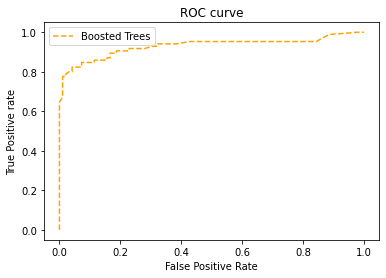

AUC Score: 0.93


In [8]:
gradient_boosted_tree(features, y.values.ravel(), 0.1, 1001)